# Minimal Neural Network - Case Study

Notes on the lesson from http://cs231n.github.io/neural-networks-case-study/

## Introduction

First, we generate the datapoints:

In [21]:
import numpy as np
%matplotlib notebook
import matplotlib.pyplot as plt

In [22]:
N = 100  # numer of points per class
D = 2  # dimensionality
K = 3  # number of classes
X = np.zeros((N * K, D))  # data matrix (each row is a single example)
y = np.zeros(N * K, dtype='uint8')  # class labels

In [23]:
for j in range(K):
    ix = range(N * j, N * (j + 1))
    r = np.linspace(0.0, 1, N)  # radius
    t = np.linspace(j * 4, (j + 1) * 4, N) + np.random.randn(N) * 0.2
    X[ix] = np.c_[r * np.sin(t), r * np.cos(t)]
    y[ix] = j

<IPython.core.display.Javascript object>


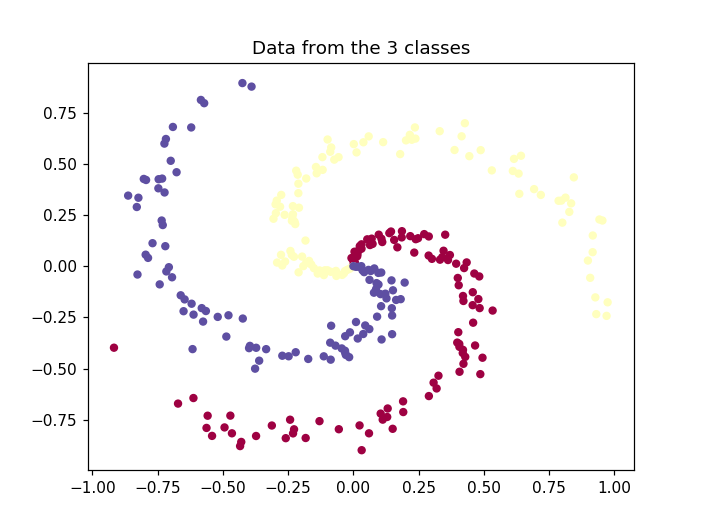

In [24]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=20, cmap=plt.cm.Spectral)
plt.title('Data from the 3 classes')

No need to preprocess the dataset, as the features are already in a nice range from -1 to 1.

## Softmax Linear Classifier

### Weights and biases initialization

We first initialize the parameters (weights and biases):

In [25]:
W = 0.01 * np.random.randn(D, K)
b = np.zeros((1, K))

Then compute the class scores:

In [26]:
scores = np.dot(X, W) + b  # size 300x3, each row the score per class

The softmax:

In [27]:
softmax = np.exp(scores)
for i in range(N):
    softmax[i,:] /= np.sum(softmax[i,:])
# or, if I knew better, also:
# exp_scores = np.exp(scores)
# softmax = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)

And the loss:

In [28]:
num_examples = X.shape[0]

data_loss = -np.sum(np.log(softmax[i, y[i]]) for i in range(len(y))) / num_examples

reg = 1e-3  # regularization strength
reg_loss = 0.5 * reg * np.sum(W*W)

loss = data_loss + reg_loss

### Backpropagation for gradient computation

Partial derivative wrt scores:

In [29]:
dloss_dscores = softmax
dloss_dscores[range(num_examples),y] -= 1
dloss_dscores /= num_examples

Wrt `W` and `b`:

In [30]:
dloss_dW = np.dot(X.T, dloss_dscores) + reg * W
dloss_db = np.sum(dloss_dscores, axis=0, keepdims=True)

### Parameter update

In [31]:
step_size = 1e0
W += -step_size * dloss_dW
b += -step_size * dloss_db

### Putting it all together (copied from course notes)

In [32]:
# Train a Linear Classifier.

# Initialize parameters randomly.
W = 0.01 * np.random.randn(D, K)
b = np.zeros((1, K))

# Hyperparameters.
step_size = 1e-0
reg = 1e-3  # regularization strength

# Gradient descent loop.
num_examples = X.shape[0]
for i in range(200):
  # Evaluate class scores, [N x K].
  scores = np.dot(X, W) + b 
  
  # Compute the class probabilities.
  exp_scores = np.exp(scores)
  softmax = exp_scores / np.sum(exp_scores, axis=1, keepdims=True) # [N x K]
  
  # Compute the loss: average cross-entropy loss and regularization.
  corect_logprobs = -np.log(softmax[range(num_examples), y])
  data_loss = np.sum(corect_logprobs) / num_examples
  reg_loss = 0.5 * reg * np.sum(W * W)
  loss = data_loss + reg_loss

  if i % 20 == 0:
    print("Loss at iteration %d: %f" % (i, loss))
  
  # Compute the gradient on scores.
  dloss_dscores = softmax
  dloss_dscores[range(num_examples), y] -= 1
  dloss_dscores /= num_examples
  
  # Backpropate the gradient to the parameters (W, b).
  dloss_dW = np.dot(X.T, dloss_dscores) + reg * W
  dloss_db = np.sum(dloss_dscores, axis=0, keepdims=True)
  
  # Perform a parameter update
  W += -step_size * dloss_dW
  b += -step_size * dloss_db

Loss at iteration 0: 1.097428
Loss at iteration 20: 0.838698
Loss at iteration 40: 0.789430
Loss at iteration 60: 0.773817
Loss at iteration 80: 0.767592
Loss at iteration 100: 0.764786
Loss at iteration 120: 0.763425
Loss at iteration 140: 0.762734
Loss at iteration 160: 0.762370
Loss at iteration 180: 0.762175


### Accuracy

In [33]:
scores = np.dot(X, W) + b
predicted_class = np.argmax(scores, axis=1)
print('Training accuracy: %.2f' % (np.mean(predicted_class == y)))

Training accuracy: 0.52


## Neural Network

**TO DO**